In [2]:
import pandas as pd  # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt  # type: ignore

In [3]:
df = pd.read_csv("score.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


<function matplotlib.pyplot.show(close=None, block=None)>

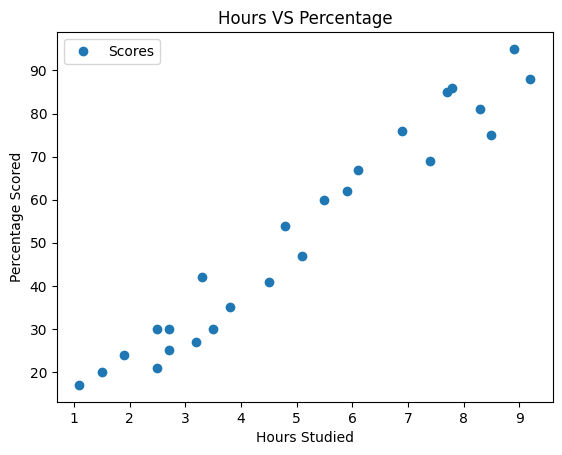

In [4]:
df.plot(x="Hours", y="Scores", style="o")
plt.title("Hours VS Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")
plt.show

In [5]:
x = df.iloc[:,:-1].values
y = df.iloc[:,1:].values

In [6]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [7]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]])

In [8]:
from sklearn.model_selection import train_test_split # type: ignore

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [9]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [10]:
reg.fit(x_train, y_train)

LinearRegression()

In [11]:
reg.predict(x_test)

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

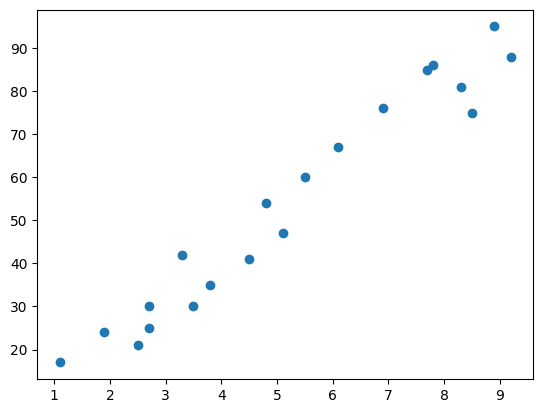

In [12]:
plt.scatter(x_train,y_train)

In [14]:
print(f"The calculated parameters are theta_1: {reg.coef_[0]}, and theta_2: {reg.intercept_}")

The calculated parameters are theta_1: [9.91065648], and theta_2: [2.01816004]


In [15]:
line = reg.coef_*x_test+reg.intercept_

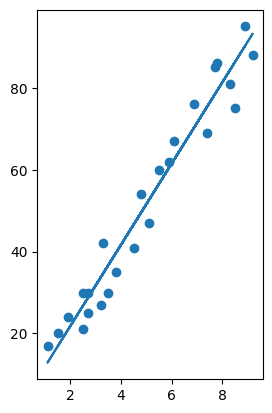

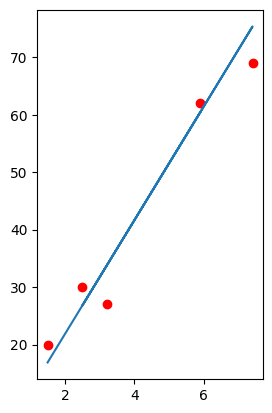

In [17]:
preds = reg.predict(x)

plt.subplot(1, 2, 1)
plt.scatter(x, y)
plt.plot(x, preds)
plt.show()

# Plotting for the test data
plt.subplot(1, 2, 2)
plt.scatter(x_test, y_test, color="red")
plt.plot(x_test, line)
plt.show()

In [32]:
print(x_test) # Testing data - In Hours
y_pred = reg.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [35]:
# Comparing Actual vs Predicted
Newdf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
Newdf  

ValueError: Per-column arrays must each be 1-dimensional

In [36]:
#You can also test with your own data
hours = 9.5
own_pred = reg.predict([[9.5]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.5
Predicted Score = [96.16939661]


In [37]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
